# Aquire Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from env import host, user, password
import acquire
import prepare

sql_query = '''select *
    from  properties_2017
    join predictions_2017 using(parcelid)
    where transactiondate between "2017-05-01" and "2017-08-31"
        and propertylandusetypeid between 260 and 266
            or propertylandusetypeid between 273 and 279
            and not propertylandusetypeid = 274
        and unitcnt = 1;
    '''
connection = f'mysql+pymysql://{user}:{password}@{host}/zillow'
df = pd.read_sql(sql_query, connection)

# Lets Clean the Data

df.head()

df.info()

df.describe()

df = df.dropna(axis=1,thresh=35000)

df.head()

df.info()

- What I want to do on top of that:
    - Delete columns:
        - `calculatedbathnbr`
            - because we already have the finished number of bathrooms
        - `finishedsquarefeet12`
            - because we have our finished square feet already
        - `propertycountylandusecode`
            - because we have the id for this already
        - `propertyzoningdesc`
            - because it is not that helpful
        - `logerror`
            - because logerror is an unknown feature in data dictonary
        - `transactiondate`
            - because it is not that helpful
        - `yearbuilt`
            - because it would not be read as a year but as a numeric value
        - `taxvaluedollarcnt`
            - using this would be cheating
        - `landtaxvaluedollarcnt`
            - using this would be cheating
        - `taxvaluedollarcnt`
            - using this would be cheating
        - `rawcensustractandblock`
            - because it is uneeded
        - `censustractandblock`
            - because it is uneeded
    - Rename columns:
        - `bathroomcnt` to "bathrooms"
        - `bedroomcnt` to "bedrooms"
        - `calculatedfinishedsquarefeet` to "house_square_feet"
        - `fullbathcnt` to "full_baths"
        - `regionidzip` to "zip_code"
        - `regionidcity` to "city"
        - `regionidcounty` to "county"

df = df.drop(['calculatedbathnbr', 'finishedsquarefeet12', 
             'propertycountylandusecode', 'logerror', 'transactiondate',  
             'yearbuilt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 
              'rawcensustractandblock', 'censustractandblock', 
              'structuretaxvaluedollarcnt', 'parcelid', 'id'], axis=1)
df.head()

df = df.rename(columns={'bathroomcnt':'bathrooms', 'bedroomcnt':'bedrooms', 
                       'calculatedfinishedsquarefeet':'square_feet', 
                       'fullbathcnt':'full_baths', 'regionidzip':'zip_code', 
                       'regionidcity':'city', 'regionidcounty':'county'})
df.head()

df.info()

df.isnull().sum()

df = df.dropna()
df.info()

#this ended up dropping from 38582 to 37712
    # we lost 870 rows by dropping
    

# 

In [2]:
df = acquire.acquire_zillow()
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,None,NaN,2.0,...,289445.0,2016.0,213516.0,3490.16,None,NaN,6.059001e+13,625,-0.061973,2017-08-04
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,None,NaN,6.037220e+13,1018,0.017785,2017-07-21
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,None,9.0,2.0,...,810694.0,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,1772,-0.146056,2017-06-30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38582 entries, 0 to 38581
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      38582 non-null  int64  
 1   id                            38582 non-null  int64  
 2   airconditioningtypeid         12224 non-null  float64
 3   architecturalstyletypeid      101 non-null    float64
 4   basementsqft                  27 non-null     float64
 5   bathroomcnt                   38582 non-null  float64
 6   bedroomcnt                    38582 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         23706 non-null  float64
 9   calculatedbathnbr             38438 non-null  float64
 10  decktypeid                    331 non-null    float64
 11  finishedfloor1squarefeet      3338 non-null   float64
 12  calculatedfinishedsquarefeet  38474 non-null  float64
 13  f

In [4]:
df.describe()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,logerror
count,3.858200e+04,3.858200e+04,12224.000000,101.000000,27.000000,38582.000000,38582.000000,23706.000000,38438.000000,331.0,...,84.0,3.853800e+04,3.858100e+04,38582.0,3.858100e+04,38581.000000,1268.000000,3.843800e+04,38582.000000,38582.000000
mean,1.310076e+07,1.500629e+06,1.900196,7.564356,639.703704,2.274804,3.012234,6.610394,2.282923,66.0,...,1.0,1.908288e+05,4.968970e+05,2016.0,3.062809e+05,6047.039531,14.070978,6.050143e+13,52114.257737,0.015858
std,3.700368e+06,8.591952e+05,3.112632,3.232386,445.977907,0.949997,1.028056,1.694360,0.941981,0.0,...,0.0,2.384854e+05,6.329361e+05,0.0,4.585448e+05,7369.426329,1.482764,2.118134e+11,12046.708853,0.171989
min,1.071186e+07,3.490000e+02,1.000000,2.000000,100.000000,0.000000,0.000000,1.000000,1.000000,66.0,...,1.0,1.290000e+02,1.000000e+03,2016.0,1.000000e+03,19.920000,7.000000,6.037101e+13,625.000000,-4.453964
25%,1.154637e+07,7.601705e+05,1.000000,7.000000,349.000000,2.000000,2.000000,6.000000,2.000000,66.0,...,1.0,8.464225e+04,2.092220e+05,2016.0,8.702300e+04,2724.530000,14.000000,6.037400e+13,41834.250000,-0.023437
50%,1.260209e+07,1.507442e+06,1.000000,7.000000,604.000000,2.000000,3.000000,7.000000,2.000000,66.0,...,1.0,1.370000e+05,3.640000e+05,2016.0,2.080470e+05,4467.070000,15.000000,6.037651e+13,52150.500000,0.006787
75%,1.429667e+07,2.243124e+06,1.000000,7.000000,743.000000,3.000000,4.000000,8.000000,3.000000,66.0,...,1.0,2.200000e+05,5.779140e+05,2016.0,3.764150e+05,6988.220000,15.000000,6.059052e+13,62491.750000,0.037581
max,1.676878e+08,2.982274e+06,13.000000,21.000000,1969.000000,11.000000,12.000000,12.000000,11.000000,66.0,...,1.0,1.142179e+07,2.385837e+07,2016.0,1.635060e+07,276797.830000,15.000000,6.111009e+13,72844.000000,3.175688


In [5]:
df = prepare.clean_zillow(df)
df.head()

,bathrooms,bedrooms,square_feet,fips,full_baths,latitude,longitude,propertylandusetypeid,city,county,zip_code,roomcnt,assessmentyear,taxamount
0,2.0,3.0,1125.0,6059.0,2.0,33922098.0,-117954970.0,266.0,18874.0,1286.0,96186.0,6.0,2016.0,3490.16
1,2.0,3.0,1316.0,6037.0,2.0,34033180.0,-118355396.0,261.0,12447.0,3101.0,95997.0,0.0,2016.0,2627.48
2,2.0,3.0,1458.0,6037.0,2.0,34686163.0,-118113100.0,261.0,5534.0,3101.0,97318.0,0.0,2016.0,2319.90
3,2.0,3.0,1766.0,6037.0,2.0,34073222.0,-118390965.0,266.0,10389.0,3101.0,96086.0,0.0,2016.0,9407.01
4,1.0,2.0,1421.0,6037.0,1.0,33999877.0,-118291863.0,261.0,12447.0,3101.0,96018.0,0.0,2016.0,543.69


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37712 entries, 0 to 38581
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathrooms              37712 non-null  float64
 1   bedrooms               37712 non-null  float64
 2   square_feet            37712 non-null  float64
 3   fips                   37712 non-null  float64
 4   full_baths             37712 non-null  float64
 5   latitude               37712 non-null  float64
 6   longitude              37712 non-null  float64
 7   propertylandusetypeid  37712 non-null  float64
 8   city                   37712 non-null  float64
 9   county                 37712 non-null  float64
 10  zip_code               37712 non-null  float64
 11  roomcnt                37712 non-null  float64
 12  assessmentyear         37712 non-null  float64
 13  taxamount              37712 non-null  float64
dtypes: float64(14)
memory usage: 4.3 MB


In [7]:
df.describe()

,bathrooms,bedrooms,square_feet,fips,full_baths,latitude,longitude,propertylandusetypeid,city,county,zip_code,roomcnt,assessmentyear,taxamount
count,37712.000000,37712.000000,37712.000000,37712.000000,37712.000000,3.771200e+04,3.771200e+04,37712.000000,37712.000000,37712.000000,37712.000000,37712.000000,37712.0,37712.000000
mean,2.273865,3.015141,1754.364765,6049.926230,2.200228,3.400127e+07,-1.182001e+08,262.347423,33171.736291,2486.261720,96626.682886,1.641997,2016.0,5998.734649
std,0.936730,1.011697,922.347731,21.458112,0.917901,2.678963e+05,3.674970e+05,2.213248,45083.896407,816.081333,4433.841544,2.940626,0.0,7291.567272
min,1.000000,0.000000,240.000000,6037.000000,1.000000,3.333960e+07,-1.194484e+08,260.000000,3491.000000,1286.000000,95982.000000,0.000000,2016.0,19.920000
25%,2.000000,2.000000,1171.000000,6037.000000,2.000000,3.380051e+07,-1.184186e+08,261.000000,12447.000000,1286.000000,96208.000000,0.000000,2016.0,2709.780000
50%,2.000000,3.000000,1518.000000,6037.000000,2.000000,3.401535e+07,-1.181692e+08,261.000000,25218.000000,3101.000000,96411.000000,0.000000,2016.0,4442.880000
75%,3.000000,4.000000,2068.250000,6059.000000,3.000000,3.417570e+07,-1.179128e+08,266.000000,45457.000000,3101.000000,96990.000000,3.000000,2016.0,6927.255000
max,11.000000,12.000000,17245.000000,6111.000000,11.000000,3.481877e+07,-1.175724e+08,266.000000,396556.000000,3101.000000,399675.000000,15.000000,2016.0,276797.830000


In [8]:
df = prepare.focused_zillow(df)
df.head()

,square_feet,bedrooms,bathrooms,zip_code,propertylandusetypeid,taxamount
0,1125.0,3.0,2.0,96186.0,266.0,3490.16
1,1316.0,3.0,2.0,95997.0,261.0,2627.48
2,1458.0,3.0,2.0,97318.0,261.0,2319.90
3,1766.0,3.0,2.0,96086.0,266.0,9407.01
4,1421.0,2.0,1.0,96018.0,261.0,543.69


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37712 entries, 0 to 38581
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   square_feet            37712 non-null  float64
 1   bedrooms               37712 non-null  float64
 2   bathrooms              37712 non-null  float64
 3   zip_code               37712 non-null  float64
 4   propertylandusetypeid  37712 non-null  float64
 5   taxamount              37712 non-null  float64
dtypes: float64(6)
memory usage: 2.0 MB


In [10]:
df.describe()

,square_feet,bedrooms,bathrooms,zip_code,propertylandusetypeid,taxamount
count,37712.000000,37712.000000,37712.000000,37712.000000,37712.000000,37712.000000
mean,1754.364765,3.015141,2.273865,96626.682886,262.347423,5998.734649
std,922.347731,1.011697,0.936730,4433.841544,2.213248,7291.567272
min,240.000000,0.000000,1.000000,95982.000000,260.000000,19.920000
25%,1171.000000,2.000000,2.000000,96208.000000,261.000000,2709.780000
50%,1518.000000,3.000000,2.000000,96411.000000,261.000000,4442.880000
75%,2068.250000,4.000000,3.000000,96990.000000,266.000000,6927.255000
max,17245.000000,12.000000,11.000000,399675.000000,266.000000,276797.830000


In [11]:
df.value_counts()

square_feet  bedrooms  bathrooms  zip_code  propertylandusetypeid  taxamount
648.0        1.0       1.0        96947.0   266.0                  3720.52      4
610.0        1.0       1.0        96330.0   266.0                  2388.63      4
868.0        1.0       1.0        96947.0   266.0                  4401.72      3
1777.0       3.0       2.0        97041.0   266.0                  7925.22      3
8469.0       12.0      6.0        95985.0   261.0                  30342.87     3
                                                                               ..
1834.0       3.0       2.5        97083.0   261.0                  1207.12      1
                                  96996.0   261.0                  3278.20      1
                                  96987.0   261.0                  6403.18      1
                                                                   2761.34      1
240.0        0.0       1.0        96515.0   261.0                  5222.26      1
Length: 37609, dtype:

In [12]:
df.isna().sum()

square_feet              0
bedrooms                 0
bathrooms                0
zip_code                 0
propertylandusetypeid    0
taxamount                0
dtype: int64

In [13]:
df.isnull().sum()

square_feet              0
bedrooms                 0
bathrooms                0
zip_code                 0
propertylandusetypeid    0
taxamount                0
dtype: int64

<AxesSubplot:title={'center':'Distribution of Square Feet'}, xlabel='square_feet', ylabel='Count'>

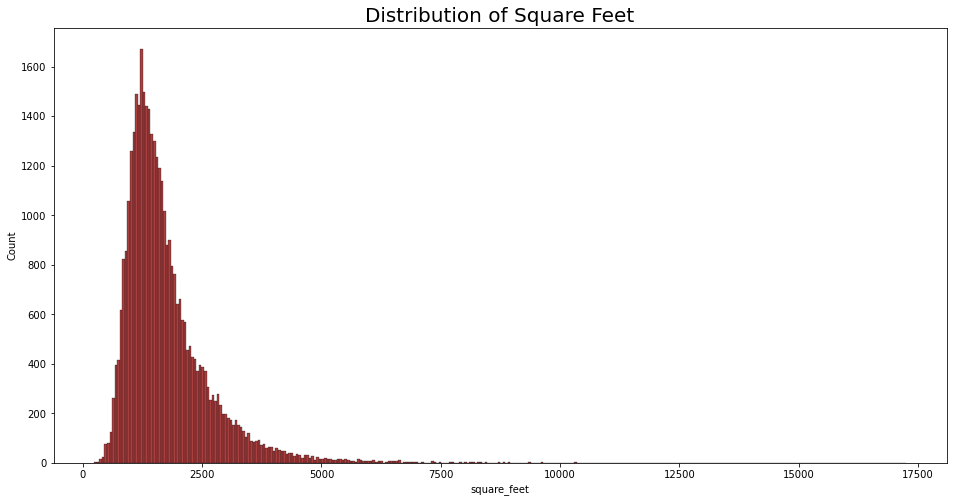

In [28]:
plt.figure(figsize=(16,8))
plt.title("Distribution of Square Feet", size=20, color='black')
sns.histplot(df.square_feet, color='darkred', ec='black')

<AxesSubplot:title={'center':'Distribution of Bedrooms'}, xlabel='bedrooms', ylabel='Count'>

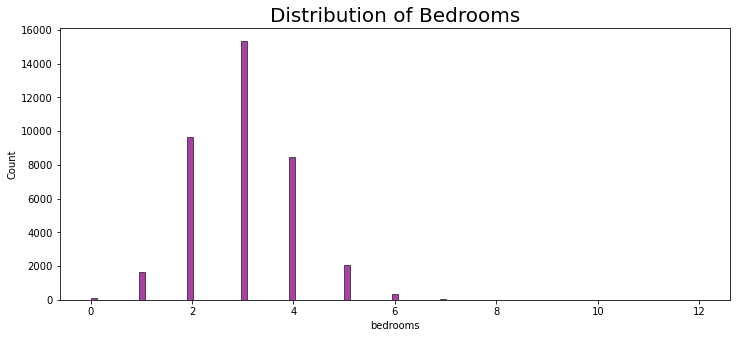

In [37]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Bedrooms", size=20, color='black')
sns.histplot(df.bedrooms, color='darkmagenta', ec='black')

<AxesSubplot:title={'center':'Distribution of Bathrooms'}, xlabel='bathrooms', ylabel='Count'>

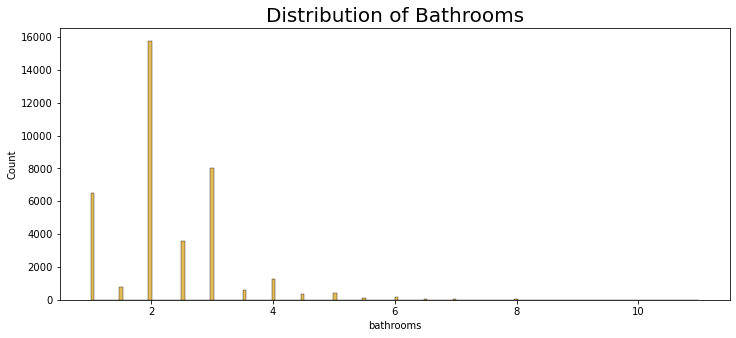

In [39]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Bathrooms", size=20, color='black')
sns.histplot(df.bathrooms, color='goldenrod', ec='black')

In [46]:
df.zip_code.min

<bound method Series.min of 0        96186.0
1        95997.0
2        97318.0
3        96086.0
4        96018.0
          ...   
38577    96983.0
38578    96050.0
38579    96030.0
38580    96356.0
38581    96346.0
Name: zip_code, Length: 37712, dtype: float64>

<AxesSubplot:title={'center':'Distribution of Zip Codes'}, xlabel='zip_code', ylabel='Count'>

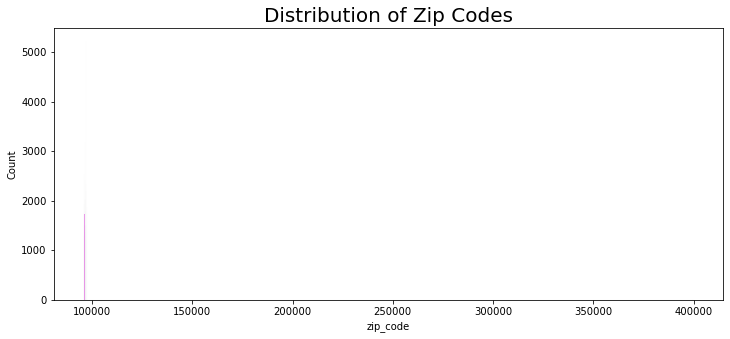

In [63]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Zip Codes", size=20, color='black')
sns.histplot(df.zip_code, color='violet', ec='black')


# Explore